In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys, time

# Why: allow the notebook to import our function from src/utils.py
sys.path.append("/Users/yashu/Documents/Bootcamp/bootcamp_SaiKrishna_Sagi/homework/stage03_python-fundamentals/src")
from utils import get_summary_stats

CSV_PATH = Path("/Users/yashu/Documents/Bootcamp/bootcamp_SaiKrishna_Sagi/homework/stage03_python-fundamentals/data/raw/bootcamp_hw3_sample.csv")

# Why: point to the CSV and output directory, so all file saves go to homework/data/processed
PROCESSED_CSV_PATH = Path("/Users/yashu/Documents/Bootcamp/bootcamp_SaiKrishna_Sagi/homework/stage03_python-fundamentals/data/processed/bootcamp_hw3_sample.csv")
PROCESSED_DIR = PROCESSED_CSV_PATH.parent

In [37]:
# create an array
arr = np.arange(200_000)

# vectorized
t0 = time.time()
vec_out = arr * 2
t_vec = time.time() - t0

# loop
t0 = time.time()
loop_out = [x * 2 for x in arr]
t_loop = time.time() - t0

assert np.all(vec_out == np.array(loop_out))
print(f"Vectorized seconds: {t_vec:.6f}")
print(f"Loop seconds:       {t_loop:.6f}")


Vectorized seconds: 0.000410
Loop seconds:       0.016857


In [38]:
# Why: Homework requires loading CSV and using .info() and .head()

df = pd.read_csv(CSV_PATH)

print(df.info())   # column types + null counts
print(df.head())   # first 5 rows for a quick glance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      1000 non-null   int64  
 1   timestamp     1000 non-null   object 
 2   qty           967 non-null    float64
 3   price         968 non-null    float64
 4   revenue       1000 non-null   float64
 5   category      1000 non-null   object 
 6   city          1000 non-null   object 
 7   sku           1000 non-null   object 
 8   is_member     1000 non-null   bool   
 9   notes         721 non-null    object 
 10  daily_visits  1000 non-null   int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 79.2+ KB
None
   order_id   timestamp  qty  price  revenue category     city       sku  \
0         1  2024-01-01  1.0    NaN    74.99   beauty       LA   F-Q909    
1         2  2024-01-02  4.0  89.21   356.84   beauty    Miami    a-v472   
2         3  2024-01-03  4.0  

In [39]:
summary, grouped = get_summary_stats(df, group_col="category")
print(summary)
if grouped is not None:
    print(grouped)

           order_id   timestamp         qty       price      revenue category  \
count   1000.000000        1000  967.000000  968.000000  1000.000000     1000   
unique          NaN        1000         NaN         NaN          NaN        5   
top             NaN  2024-01-01         NaN         NaN          NaN   beauty   
freq            NaN           1         NaN         NaN          NaN      215   
mean     500.500000         NaN    2.996898   52.694628   157.873680      NaN   
std      288.819436         NaN    1.416039   27.838265   118.082452      NaN   
min        1.000000         NaN    1.000000    5.050000     5.100000      NaN   
25%      250.750000         NaN    2.000000   28.245000    62.787500      NaN   
50%      500.500000         NaN    3.000000   51.880000   127.185000      NaN   
75%      750.250000         NaN    4.000000   77.457500   233.722500      NaN   
max     1000.000000         NaN    5.000000   99.950000   499.350000      NaN   

        city      sku is_me

In [40]:
summary.to_csv(PROCESSED_DIR / "summary.csv")
summary.to_json(PROCESSED_DIR / "summary.json")

if grouped is not None:
    grouped.to_csv(PROCESSED_DIR / "grouped.csv")
    grouped.to_json(PROCESSED_DIR / "grouped.json")

print("Saved outputs to", PROCESSED_DIR)


Saved outputs to /Users/yashu/Documents/Bootcamp/bootcamp_SaiKrishna_Sagi/homework/stage03_python-fundamentals/data/processed


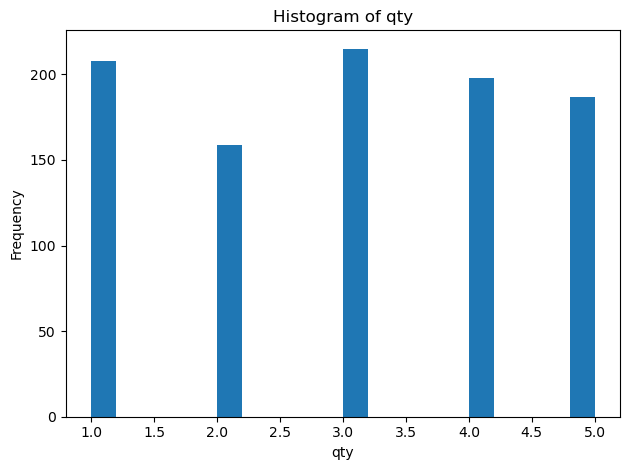

Histogram saved to /Users/yashu/Documents/Bootcamp/bootcamp_SaiKrishna_Sagi/homework/stage03_python-fundamentals/data/processed/hist_qty.png


In [41]:
# Bonus plot: save histogram of a useful numeric column
num_cols = df.select_dtypes(include="number").columns
skip_cols = {"order_id", "id", "index"}  # avoid ID-like columns

plot_col = next((c for c in num_cols if c not in skip_cols), None)

if plot_col:
    ax = df[plot_col].plot(kind="hist", bins=20, title=f"Histogram of {plot_col}")
    plt.xlabel(plot_col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    
    out_path = PROCESSED_DIR / f"hist_{plot_col}.png"
    plt.savefig(out_path, dpi=150)
    plt.show()
    print(f"Histogram saved to {out_path}")
else:
    print("No suitable numeric columns to plot.")
